# Hypothesis Testing - Obesity in the USA
<strong>Programming language:</strong> R<br/>
<strong>Dataset source:</strong> Kaggle - [Medical Cost Personal Datasets][id]

[id]: https://www.kaggle.com/mirichoi0218/insurance#insurance.csv "dataset"

## Overview
In this post, I will conduct One-sample t-test, Two proportion z-test, F-test, and Two-sample t-test to examine the previous research findings and to make statistical inferences.

## Dataset Overview
The "insurance.csv" dataset, which is downloaded from Kaggle, includes details about personal information and insurance charges. There are 1338 observations of 7 variables. To examine the <strong>obesity</strong> problem in the United States, columns such as "bmi", "region", and "smoker" have been used.<br />
The column "bmi" indicates Body Mass Index, the column "region" describes a residential area in the US (northeast/southeast/southwest/northwest), and the column "smoker" records whether that person is a smoker (yes/no).

In [1]:
# Load package
library(gginference)
library(visualize)

# Load data
insurance<- read.csv(file = '/Users/yuki0416/Desktop/Q2-Spring/Intermediate Analytics/Week 2/Assignment/Inferential Statistics/insurance.csv',header = TRUE)

# Check the internal structure
str(insurance)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


<br /> 
## 1. Obesity in the United States (One-sample t-test)
Previous research has suggested that obesity rates continue to rise among adults in the United States (Simon, 2018). Also, Sandoiu (2019) claimed that the average BMI in the U.S. is on the rise despite increasing weight loss efforts. Therefore, since a BMI of 30 and above is considered obese, I would like to test <ins>if the average BMI in the US is greater than 30</ins>.

### Assumption Checking
Before we do a one sample t-test, we need to check if we can reasonably treat the mean of this sample as normally distributed. <br />
This happens when either of the following hold:<br />
1. The data comes from a normal distribution.
2. The number of data > 30.<br />

Since we have a big sample, we meet the second situation. On the other hand, if the sample size is small, we can check if the data comes from a normal distribution using a Normal Q-Q plot, or normal quantile-quantile plot.

### Define the Null Hypothesis and Alternative Hypothesis
<strong>μ</strong>: the population mean of BMI<br />
<strong>H<sup>0</sup></strong> :  μ = 30<br />
<strong>H<sup>1</sup></strong> :  μ > 30<br />
(use α = 0.05)

[1] 3.642239e-05

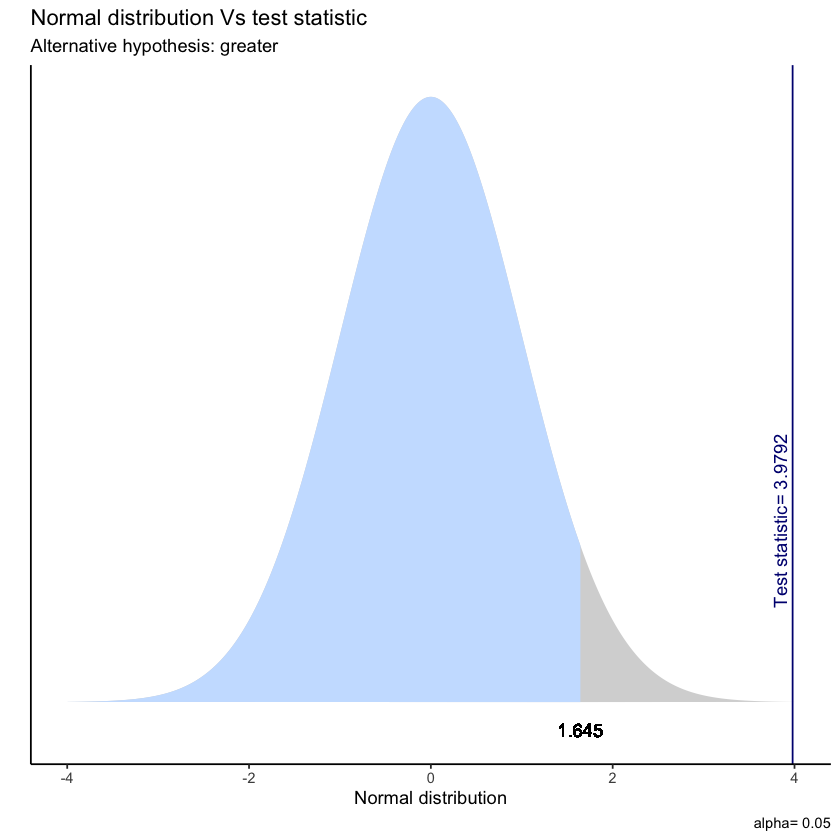

In [2]:
attach(insurance)

# Use t-test rather than z-test, since the population standard deviation is unknown
BMI_ttest <- t.test(bmi, mu=30, alternative = c("greater"))
BMI_ttest$p.value

# Visualize one-sample t-test
ggttest(BMI_ttest)

### Inferential Statistical Analysis
From the graph above, we can tell that the t-test value (3.9792) is greater than the critical value (1.645). Also, the p-value (3.6422e-05) is less than 0.05. Thus, at the α = 0.05 level of significance, there is sufficient evidence to reject the null hypothesis and to conclude that the population mean of BMI is greater than 30.<br /> 
Note that here I used one-sample t-test rather than one-sample z-test, since the population standard deviation is unknown.

<br /> 
## 2. Regional Differences in Obesity Prevalence (Two proportion z-test)
Myers, Slack, Martin, Broyles, and Heymsfield (2015) pointed out that obesity rates varied by region of the United States. To be more specific, the study shows that the southeast is a high-obesity region and the northwest is a low-obesity region. Thus, I would like to test <ins>if the proportion of obesity in the southeast is higher than the proportion of obesity in the northwest</ins>.

### Define the Null Hypothesis and Alternative Hypothesis
<strong>p1</strong>: the population proportion of obesity in the southeast<br />
<strong>p2</strong>: the population proportion of obesity in the northwest<br />
<strong>H<sup>0</sup></strong> :  p1 = p2<br />
<strong>H<sup>1</sup></strong> :  p1 > p2<br />
(use α = 0.05)

In [3]:
# Use subset() to separate vectors for southeast and northwest
southeast <- subset(insurance, region == "southeast", select = c(bmi))
northwest <- subset(insurance, region == "northwest", select = c(bmi))

# Calculate denominator
se_denominator <- nrow(southeast) 
nw_denominator <- nrow(northwest) 

# Calculate numerator
se_numerator <- sum(southeast$bmi >=30)
nw_numerator <- sum(northwest$bmi >=30)

# Compute the z-test to test for equal proportions
obesity_ztest <- prop.test(x = c(se_numerator, nw_numerator), n = c(se_denominator, nw_denominator), alternative = c("greater"))
obesity_ztest$p.value

[1] 1.553041e-08

In [4]:
# Extract the z statistic
round(sqrt(obesity_ztest$statistic), digits=3)

# Find a critical value, alpha=0.05, right-tail
round(qnorm(.95), digits=3)

X-squared 
    5.535

[1] 1.645

### Inferential Statistical Analysis
From outputs, we can see that the statistic value (5.535) is greater than the critical value (1.645). Besides, the p-value (1.55304e-08) is less than the significance level 0.05. Therefore, at the α = 0.05 level of significance, there is sufficient evidence to reject the null hypothesis and to support the claim that the population proportion of obesity in the southeast is higher than the population proportion of obesity in the northwest.

<br /> 
## 3. The Relationship between Cigarette Consumption and BMI (Two-sample t-test)
Jacobs (2019) found that there is a negative relationship between BMI and smoking frequency. That is, compared with non-smokers, people who smoke regularly have lower BMI. Therefore, I would like to examine <ins>if the average BMI of smokers is less than the average BMI of non-smokers</ins>.

### Assumption Checking (F- test)
Before we do a two sample t-test, since the default of <em>t.test</em> function is "var.equal=FALSE", let us use an f-test to check <ins>if the two populations (BMI of smokers/ BMI of non-smokers) have the same variances</ins>.

#### Define the Null Hypothesis and Alternative Hypothesis
<strong>σ1<sup>2</sup></strong>: the population variance of smoker's BMI<br />
<strong>σ2<sup>2</sup></strong>: the population variance of non-smoker's BMI<br />
<strong>H<sup>0</sup></strong> :  σ1<sup>2</sup> = σ2<sup>2</sup><br />
<strong>H<sup>1</sup></strong> :  σ1<sup>2</sup> ≠ σ2<sup>2</sup><br />
(use α = 0.05)

In [5]:
# Use subset() to separate vectors for smoker and non smoker
smoker <- subset(insurance, smoker == "yes", select = c(bmi))
nonsmoker <- subset(insurance, smoker == "no", select = c(bmi))

# Use f-test to check whether the two populations have the same variances
smoker.ftest <- var.test(smoker$bmi, nonsmoker$bmi)
fvalue <- round(smoker.ftest$statistic,digits = 3)
smoker.ftest$p.value

# Find d.f.N and d.f.D
smoker_var <- var(smoker$bmi) 
nonsmoker_var <- var(nonsmoker$bmi)
smoker_n <- nrow(smoker) 
nonsmoker_n <- nrow(nonsmoker) 

d.f.N = 0
d.f.D = 0

if (smoker_var>nonsmoker_var) {
    d.f.N = smoker_n-1
    d.f.D = nonsmoker_n-1
} else {
    d.f.N = nonsmoker_n-1
    d.f.D = smoker_n-1
}
# Since smoker var > nonsmoker var, d.f.N= smoker_n-1, d.f.D= nonsmoker_n-1

[1] 0.3391148

Warning message in title(sub = paste("μ = ", mean, ", σ² = ", var)):
“conversion failure on 'μ =  1 , σ² =  0.00926' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in title(sub = paste("μ = ", mean, ", σ² = ", var)):
“conversion failure on 'μ =  1 , σ² =  0.00926' in 'mbcsToSbcs': dot substituted for <bc>”
Warning message in title(sub = paste("μ = ", mean, ", σ² = ", var)):
“conversion failure on 'μ =  1 , σ² =  0.00926' in 'mbcsToSbcs': dot substituted for <cf>”
Warning message in title(sub = paste("μ = ", mean, ", σ² = ", var)):
“conversion failure on 'μ =  1 , σ² =  0.00926' in 'mbcsToSbcs': dot substituted for <83>”


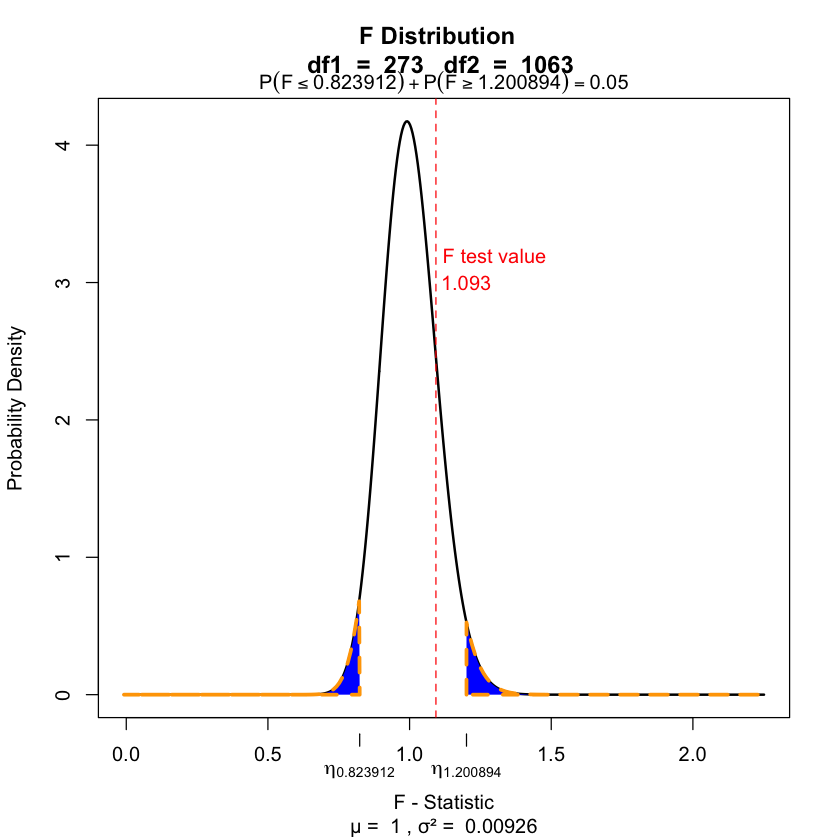

In [6]:
# Visualize f-test
# Find a critical value for a f-distribution, when α = 0.05, two tailed
visualize.f(stat=c(qf(.975, df1=d.f.N, df2=d.f.D),qf(.025, df1=d.f.N, df2=d.f.D)), df1=d.f.N, df2=d.f.D, section="tails")

# Add line and texts
abline(v = fvalue, col="red", lty=2)
text(1.3,3.2,"F test value", col="red")
text(1.2,3, fvalue, col="red")

#### Inferential Statistical Analysis
From the graph above, we can tell that the f-test value (1.093) is less than the critical value (1.2). Also, the p- value (0.3391148) is greater than 0.05. Therefore, at the α = 0.05 level of significance, there is no sufficient evidence to reject the null hypothesis. In other words, we fail to reject the null hypothesis and there is no significant difference between the variances of the two populations. Thus, we have to set "var.equal=TRUE" in the <em>t.test</em> function.

#### After determining there is no significant difference between the variances of the two populations, we can proceed with a two-sample t-test.  

### Define the Null Hypothesis and Alternative Hypothesis
<strong>μ1</strong>: the population mean of smokers BMI <br />
<strong>μ2</strong>: the population mean of non-smokers BMI <br />
<strong>H<sup>0</sup></strong> :  μ1 = μ2<br />
<strong>H<sup>1</sup></strong> :  μ1 < μ2<br />
(use α = 0.05)

In [7]:
# Compute the t-test, and assume that two variances are equal
smoker_ttest <- t.test(smoker$bmi, nonsmoker$bmi, alternative = c("less"), var.equal=TRUE)
smoker_ttest


	Two Sample t-test

data:  smoker$bmi and nonsmoker$bmi
t = 0.13708, df = 1336, p-value = 0.5545
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 0.736907
sample estimates:
mean of x mean of y 
 30.70845  30.65180 


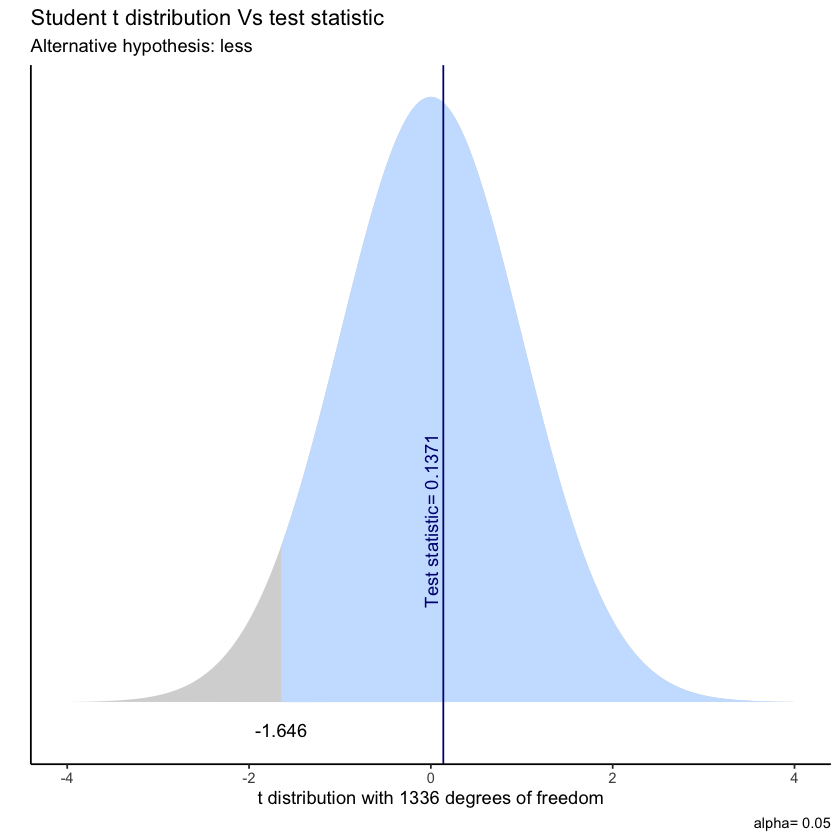

In [8]:
# Visualize two-sample t-test
ggttest(t.test(smoker$bmi, nonsmoker$bmi, alternative = c("less"), var.equal=TRUE))

### Inferential Statistical Analysis
As can be seen from the graph above, the t-test value (0.1371) falls outside the critical region (-1.646). Also, the p-value (0.5545) is greater than 0.05. Therefore, at the α = 0.05 level of significance, there is no sufficient evidence to reject the null hypothesis. In other words, there is not enough evidence to support the claim that the population mean of smokers BMI is less than the population mean of non-smokers BMI.<br />
Note that here since the two samples are independent, I used the two-sample t-test, also called the independent t-test. On the other hand, if two samples are dependent, we have to use a paired t-test and set "paired=TRUE" when using <em>t.test</em> function.

## Conclusion
The paper aimed to use data from a random sample to make inferences about a population, and to test the previous research findings. 
1. <strong>One-sample t-test</strong> was used to establish that the average BMI in the United States is greater than 30, which considered the obesity threshold.
2. <strong>Two proportion z-test</strong> was used to conclude that the proportion of obesity in the southeast is higher than the proportion of obesity in the northwest, which is identical to previous research. 
3. <strong>F-test</strong> was used to examine the variances of the two populations (BMI of smokers/ BMI of non-smokers).
4. <strong>Two-sample t-test</strong> was used to establish that there is not enough evidence to support the claim that the population mean of smokers BMI is less than the population mean of non-smokers BMI.

Overall, different kinds of hypothesis tests were used to answer questions. Besides, graphs were helpful to summarize results and provide more insights into data. 

## References
Jacobs, M. (2019, June). <em>Adolescent smoking: The relationship between cigarette con sumption and BMI</em>. Retrieved from https://www.sciencedirect.com/science/article/pii/S2352853218301305
<br />
Myers, C. A., Slack, T., Martin, C. K., Broyles, S. T., & Heymsfield, S. B. (2015, February). <em>Regional disparities in obesity prevalence in the United States: A spatial regime analysis</em>. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4310761/
<br />
Sandoiu, A. (2019, November 19). <em>Average US BMI on the rise despite increasing weight loss efforts</em>. Retrieved from https://www.medicalnewstoday.com/articles/327053
<br />
Simon, S. (2018, April 6). <em>Obesity Rates Continue to Rise Among Adults in the US</em>. Retrieved from https://www.cancer.org/latest-news/obesity-rates-continue-to-rise-among-adults-in-the-us.html